In [2]:
import os
os.environ["PLUMED_KERNEL"] = "/home/jakub/anaconda3/envs/openmm/lib/libplumedKernel.so"
import plumed
p=plumed.Plumed()
data = plumed.read_as_pandas("tmp/fes-rew-test.dat")
print(data.head())

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jakub/anaconda3/envs/openmm/lib/libplumedKernel.so" +++


        cmap         d  file.free  uncertainty
0  21.859654  1.281616        inf          inf
1  22.099536  1.281616        inf          inf
2  22.339418  1.281616        inf          inf
3  22.579300  1.281616        inf          inf
4  22.819182  1.281616        inf          inf


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/jakub/anaconda3/envs/openmm/lib/libplumedKernel.so" +++
/tmp/ipykernel_58807/181493966.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = plumed.read_as_pandas("tmp/fes-rew-test.dat")


/tmp/ipykernel_3702/3931475666.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  kernels = pd.read_csv(



 using cv "cmap" found at column 2
 using cv "d" found at column 3
 using bias "opes.bias" found at column 4
                              


/tmp/ipykernel_3702/3931475666.py:40: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("tmp/fes-rew-test.dat")
/tmp/ipykernel_3702/3931475666.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=plumed.read_as_pandas("tmp/fes-rew-test.dat")
/tmp/ipykernel_3702/3931475666.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


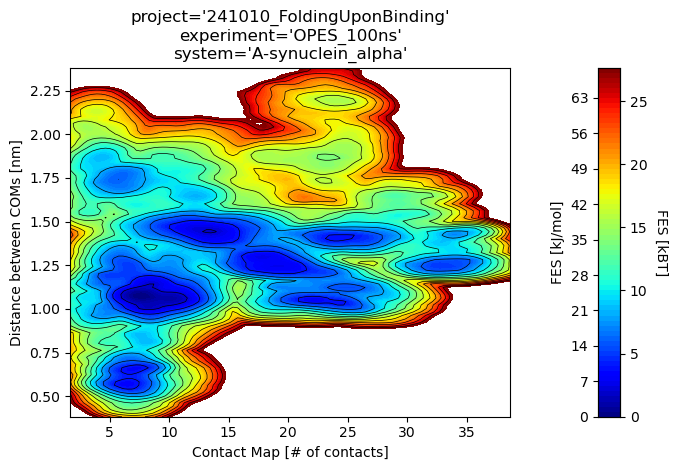

AssertionError: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import plumed
import numpy as np

def analyze_fes(project, experiment, system):
    # Define the path to the FES_from_Reweighting.py script
    FES_SCRIPT = "../FES_from_Reweighting.py"

    kernels = pd.read_csv(
        f"/home/jakub/phd/openmm-md/scripts/{project}/{experiment}/{system}/{system}.kernels",
        delim_whitespace=True,
        skiprows=6,
        header=None,
        names=['time', 'cv', 'd', 'sigma_cmap', 'sigma_d', 'height', 'logweight']
    )
    SIGMA_CMAP = kernels['sigma_cmap'].iloc[-1]
    SIGMA_D =  kernels['sigma_d'].iloc[-1]

    # Define the parameters
    COLVAR_FILE = f"/home/jakub/phd/openmm-md/scripts/{project}/{experiment}/{system}/{system}.colvar"
    TEMP = 300
    NUM_BLOCKS = 1 # computes the errors

    # Run the FES_from_Reweighting.py script with the specified parameters
    os.makedirs('tmp', exist_ok=True)
    subprocess.run([
        'python3', FES_SCRIPT, 
        '--colvar', COLVAR_FILE, 
        '--temp', str(TEMP), 
        '--sigma', f"{SIGMA_CMAP},{SIGMA_D}", 
        '--blocks', str(NUM_BLOCKS), 
        '--outfile', 'tmp/fes-rew-test.dat',
        '--cv', 'cmap,d'
    ])

    # plot final fes
    data=plumed.read_as_pandas("tmp/fes-rew-test.dat")

    from mpl_toolkits.axes_grid1 import make_axes_locatable


    # get data for contour plot
    cmap = np.array(data["cmap"]).reshape(101,101)
    d = np.array(data["d"]).reshape(101,101)
    fes = np.array(data["file.free"]).reshape(101,101)

    # Create figure and axis
    fig, ax = plt.subplots()

    plt.title(f"{project=}\n{experiment=}\n{system=}")
    ax.contour(cmap, d, fes, levels=range(0,70,5), linewidths=0.5, colors='k')
    ax.set_xlabel("Contact Map [# of contacts]")
    ax.set_ylabel("Distance between COMs [nm]")

    # Contour fill
    cntr = ax.contourf(cmap, d, fes, levels=range(0,70), cmap=plt.cm.jet)

    # Create an AxesDivider for colorbar control
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="20%")  # Control size and padding

    # Create colorbar in the custom axis
    cbar = plt.colorbar(cntr, cax=cax, label="FES [kJ/mol]")
    cbar.ax.yaxis.set_label_position('left')

    # Add a second scale in kBT
    # Boltzmann constant in kJ/(mol*K)
    k_B = 0.0083144621
    TEMP = 300  # Assuming temperature in Kelvin, modify as needed
    cbar_kBT = cbar.ax.twinx()
    cbar_kBT.set_ylim(cbar.vmin / (k_B * TEMP), cbar.vmax / (k_B * TEMP))
    cbar_kBT.set_ylabel('FES [kBT]', rotation=270, labelpad=15)

    # Layout adjustment
    plt.tight_layout()

    plt.show()
    assert 0 == 1

# Example usage
for system in ['A-synuclein_alpha', 'A-synuclein_general', 'CD28_alpha', 'CD28_beta', 'CD28_partial', 'sumo1', 'sumo1c']:
    analyze_fes('241010_FoldingUponBinding', 'OPES_100ns', system)


/tmp/ipykernel_49747/3853979144.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("fes-rew-test.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


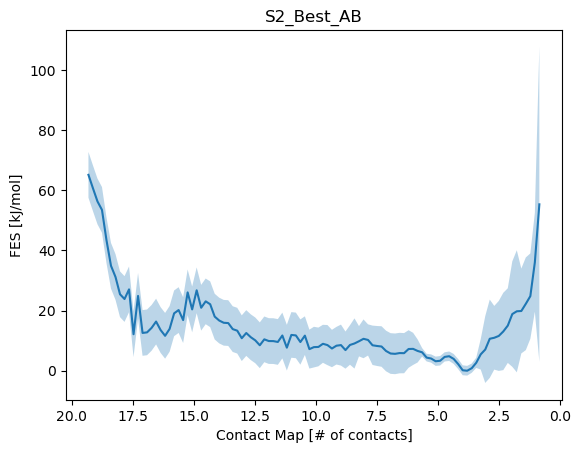

/tmp/ipykernel_47564/2346748735.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test_{i}.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])
/tmp/ipykernel_47564/2346748735.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test_{i}.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])
/tmp/ipykernel_47564/2346748735.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test_{i}.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])
/tmp/ipykernel_47564/2346748735.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

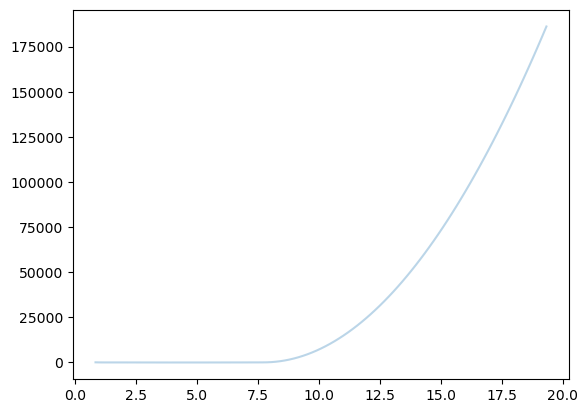

In [4]:
# Compute the average FES over fes-rew-test-{i} for i from 1 to 5 and calculate the uncertainty as standard deviation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read all the FES files
fes_data = []
for i in range(1, 6):
    data = pd.read_csv(f"fes-rew-test_{i}.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])
    fes_data.append(data)

plt.plot(fes_data[1]['cv'] / 2, fes_data[1]['fes'], alpha=0.3)

# # Plot all FES data separately with alpha=0.3
# for data in fes_data:
#     plt.plot(data['cv'] / 2, data['fes'], alpha=0.3)

/tmp/ipykernel_45301/3573942989.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("fes-rew-test.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])


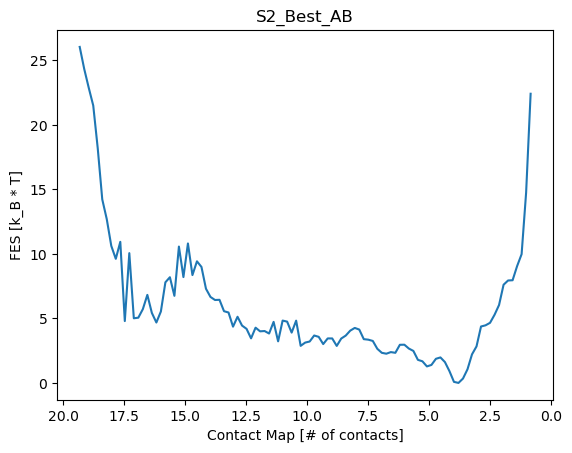

In [3]:
# fes-rew.dat is the result now
# we can plot it using matplotlib
# open dat file
import pandas as pd
import matplotlib.pyplot as plt

# Define the temperature in Kelvin
TEMP = 300

# Boltzmann constant in kJ/(mol*K)
k_B = 0.0083144621

# Convert FES from kJ/mol to k_B * T
data = pd.read_csv("fes-rew-test.dat", delim_whitespace=True, skiprows=7, header=None, names=['cv', 'fes'])
data['fes_kBT'] = data['fes'] / (k_B * TEMP)

plt.plot(data['cv']/ 2, data['fes_kBT'])
plt.gca().invert_xaxis()
plt.title("S2_Best_AB")
plt.xlabel('Contact Map [# of contacts]')
plt.ylabel('FES [k_B * T]')
plt.show()


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 2 FES files, one every 50000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-2.dat
 number of blocks is 2, while effective number is 1.28937
 average FES uncertainty is: 2.8416008085215876
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 5 FES files, one every 20000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-5.dat
 number of blocks is 5, while effective number is 1.76273
 average FES uncertainty is: 7.266880066400569
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 10 FES files, one every 10000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-10.dat
 number of blocks is 10, while effective number is 1.93741
 average FES uncertainty is: 7.694779409660869
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 20 FES files, one every 5000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-20.dat
 number of blocks is 20, while effective number is 3.42612
 average FES uncertainty is: 9.454837368535783
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 50 FES files, one every 2000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-50.dat
 number of blocks is 50, while effective number is 4.4242
 average FES uncertainty is: 14.228434608136391
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 100 FES files, one every 1000 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-100.dat
 number of blocks is 100, while effective number is 4.71485
 average FES uncertainty is: 17.39830545312651
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 200 FES files, one every 500 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-200.dat
 number of blocks is 200, while effective number is 7.82273
 average FES uncertainty is: 17.378102552626338
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


/home/jakub/phd/openmm-md/scripts/241013_OPES/../FES_from_Reweighting.py:194: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table(filename,dtype=float,sep='\s+',comment='#',header=None,usecols=all_cols,skiprows=skipme)

 using cv "cmap" found at column 2
 using bias "opes.bias" found at column 4
 printing 500 FES files, one every 200 samples
+++ IMPORTANT: remember to try different numbers of blocks and check for the convergence of the uncertainty estimate +++
 printing final FES with block average to fes-rew-test-numblock-500.dat
 number of blocks is 500, while effective number is 12.1537
 average FES uncertainty is: 32.0053953807431
                              


/tmp/ipykernel_49747/3627099964.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])


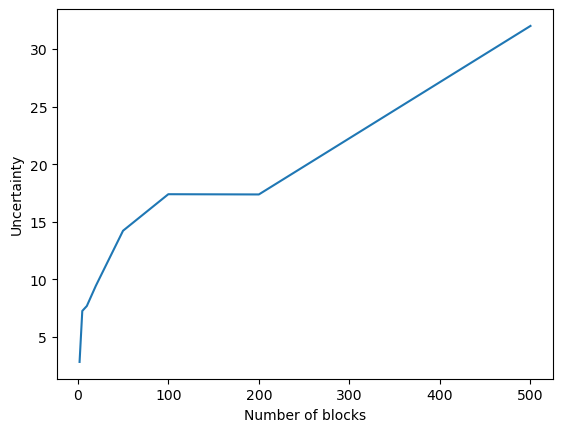

In [18]:
# compute convergence of uncertainty with different number of blocks

num_blocks = [2, 5, 10, 20, 50, 100, 200, 500]

uncertainty = []

for n in num_blocks:
    !python3 {FES_SCRIPT} --colvar {COLVAR_FILE} --temp {TEMP} --sigma {SIGMA} --blocks {n} --outfile fes-rew-test-numblock-{n}.dat
    data = pd.read_csv(f"fes-rew-test-numblock-{n}.dat", delim_whitespace=True, skiprows=9, header=None, names=['cv', 'fes', 'uncertainty'])
    uncertainty.append(data['uncertainty'].mean())

plt.plot(num_blocks, uncertainty)
plt.xlabel('Number of blocks')
plt.ylabel('Uncertainty')
plt.show()